In [47]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [48]:
from pathlib import Path 
from fastai.tabular import *
from fastai.metrics import error_rate

In [49]:
bs = 32
np.random.seed(42)

In [50]:
path = %pwd
path = Path(f'{path}/../csv/')

In [51]:
df = pd.read_csv(path/'raw.csv')
val_data = pd.read_csv(path/'validation.csv')['filename']

In [76]:
val_data

0     blink_14
1     blink_24
2     blink_17
3      blink_2
4     blink_29
5     blink_15
6     blink_23
7     blink_13
8      blink_1
9      kork_23
10     kork_21
11     kork_14
12     kork_30
13     kork_19
14      kork_5
15     kork_24
16     kork_29
17     kork_27
18    skive_24
19    skive_28
20    skive_30
21    skive_14
22    skive_15
23     skive_8
24    skive_17
25     skive_3
26    skive_27
Name: filename, dtype: object

In [52]:
idx = list(df[df['filename'].isin(val_data)].index)

In [53]:
df = df.drop(['filename'], axis=1)

In [54]:
dep_var = 'classes'
cont_names = range(3200)
procs = [Normalize]

In [55]:
cont_names = map(lambda cont_names: str(cont_names), cont_names)
cont_names = list(cont_names)

In [56]:
test = TabularList.from_df(df.iloc[idx].copy(), path=path, cont_names=cont_names)
data = (TabularList.from_df(df, path=path, cont_names=cont_names, procs=procs)
                           .split_by_idx(idx)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch(bs=16))

In [65]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


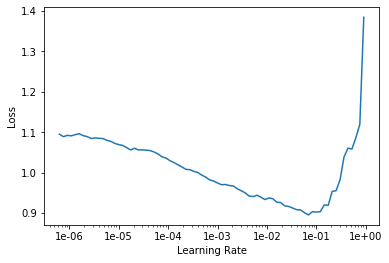

In [40]:
learn.lr_find()
learn.recorder.plot()

In [66]:
lr = 1e-3

In [67]:
learn.fit_one_cycle(30, lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.036390,1.094790,0.333333,00:00
1,0.995049,1.091753,0.333333,00:00
2,0.967535,1.085052,0.333333,00:00
3,0.942090,1.076006,0.333333,00:00
4,0.923115,1.040440,0.444444,00:00
5,0.907706,1.014095,0.444444,00:00
6,0.883273,0.989984,0.481481,00:00
7,0.881808,0.987387,0.592593,00:00
8,0.882763,0.966666,0.592593,00:00
9,0.867072,0.938197,0.592593,00:00


In [68]:
learn.save('wave1')

In [78]:
interp = ClassificationInterpretation.from_learner(learn)

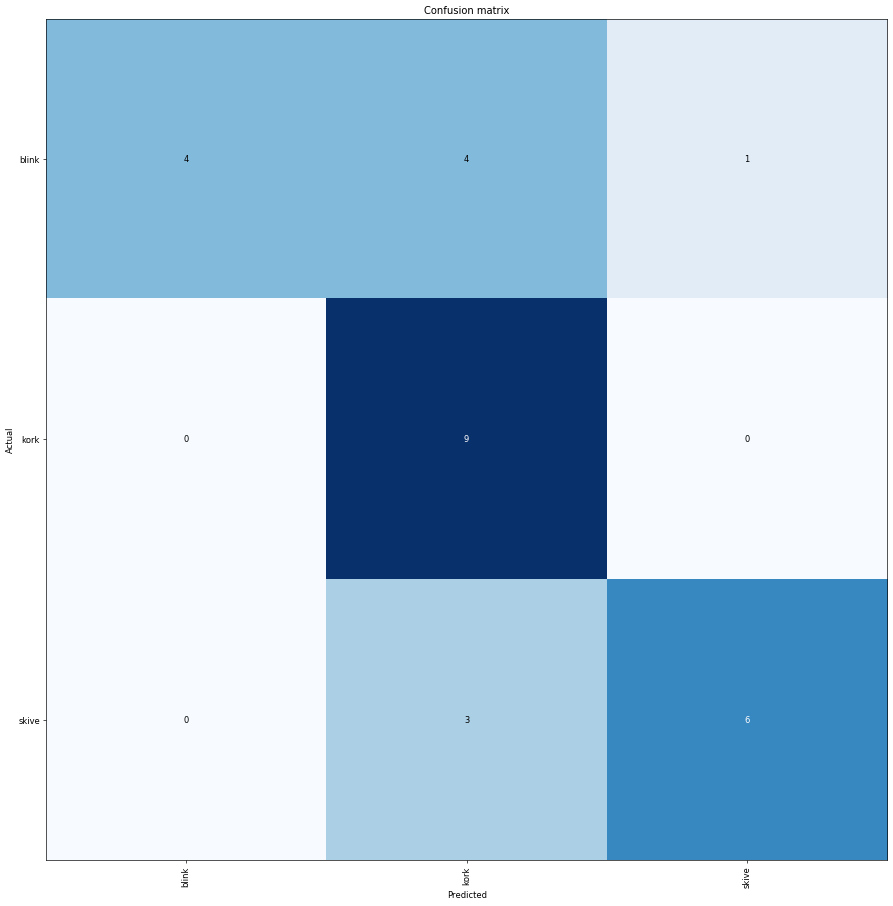

In [80]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)